In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import contextily as ctx
import geopandas

In [3]:
df = pd.read_csv('../data/raw/kc_house_data.csv')

In [4]:
waterfront_df = df[df['waterfront'] == 1]
great_view_df = df[df['view'] == 4]

In [5]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat), crs="EPSG:4326")

In [6]:
water_gdf = geopandas.GeoDataFrame(
    waterfront_df, geometry=geopandas.points_from_xy(waterfront_df.long, waterfront_df.lat), crs="EPSG:4326")

In [7]:
great_view_gdf = geopandas.GeoDataFrame(
    great_view_df, geometry=geopandas.points_from_xy(great_view_df.long, great_view_df.lat), crs="EPSG:4326")

In [8]:
gdf = gdf.to_crs(epsg=3857)
water_gdf = water_gdf.to_crs(epsg=3857)
great_view_gdf = great_view_gdf.to_crs(epsg=3857)

/Users/yrgg/opt/anaconda3/envs/gpd/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/yrgg/opt/anaconda3/envs/gpd/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/yrgg/opt/anaconda3/envs/gpd/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization me

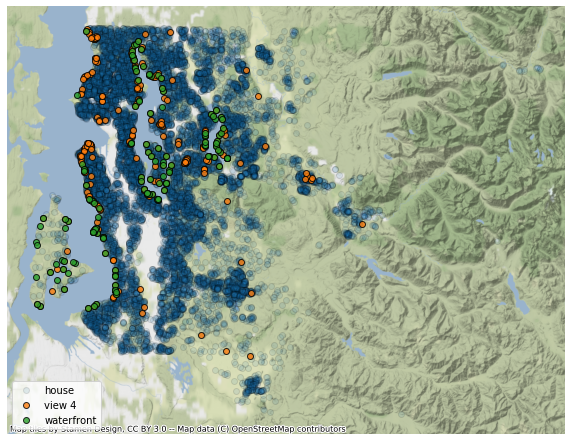

In [9]:
all_homes = gdf.plot(figsize=(10, 10), alpha=0.1, edgecolor='k', label='house')
great_view_ax = great_view_gdf.plot(ax=all_homes, alpha=0.8, edgecolor='k', label='view 4')
water_gdf_ax = water_gdf.plot(ax=great_view_ax, alpha=0.8, edgecolor='k', label='waterfront')
plt.legend()
ctx.add_basemap(water_gdf_ax, source=ctx.providers.Stamen.TerrainBackground)
water_gdf_ax.set_axis_off()


### Schools:

In [10]:
schools_df = pd.read_csv('../data/raw/school_ratings.csv', index_col=0)

In [11]:
schools_df = schools_df[schools_df['state'] == ' WA']

In [12]:
schools_df = schools_df.drop([48, 51], axis=0)

In [13]:
schools_gdf = geopandas.GeoDataFrame(
    schools_df, geometry=geopandas.points_from_xy(schools_df.long, schools_df.lat), crs="EPSG:4326")

In [14]:
expensive_homes_df = df[df['price'] > df['price'].quantile(.8)]

In [15]:
expensive_homes_gdf = geopandas.GeoDataFrame(
    expensive_homes_df, geometry=geopandas.points_from_xy(expensive_homes_df.long, expensive_homes_df.lat), crs="EPSG:4326")

In [16]:
schools_gdf = schools_gdf.to_crs(epsg=3857)

/Users/yrgg/opt/anaconda3/envs/gpd/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [17]:
expensive_homes_gdf = expensive_homes_gdf.to_crs(epsg=3857)

/Users/yrgg/opt/anaconda3/envs/gpd/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


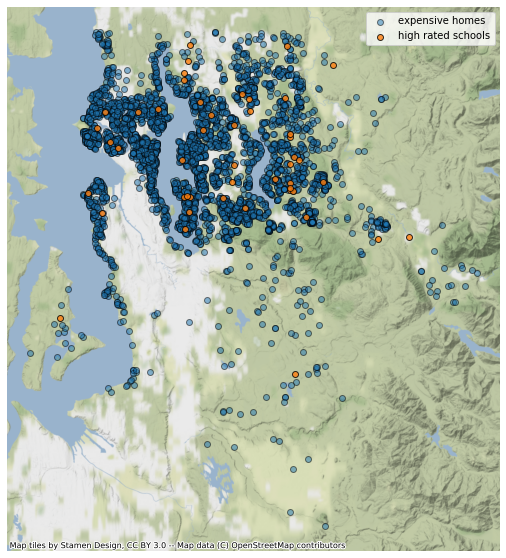

In [18]:
expensive_homes = expensive_homes_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', label='expensive homes')
schools = schools_gdf.plot(ax=expensive_homes, alpha=0.8, edgecolor='k', label='high rated schools')
plt.legend()
ctx.add_basemap(schools, source=ctx.providers.Stamen.TerrainBackground)
schools.set_axis_off()